In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('water.csv')

df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<Axes: xlabel='mortality', ylabel='hardness'>

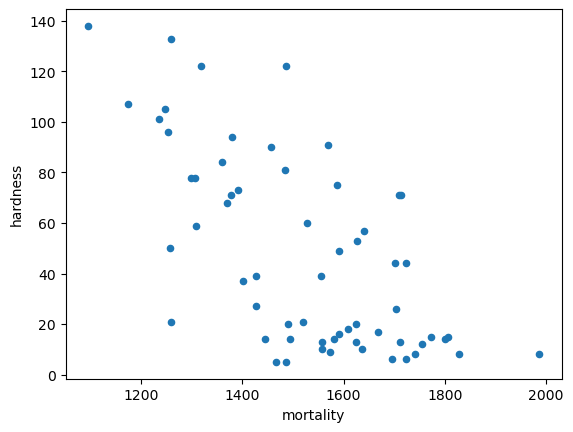

In [3]:
df.plot(kind='scatter', x='mortality', y='hardness')

In [4]:
outliers = np.where(((df['mortality']>1900) & (df['hardness']<140)) | (df['mortality']<1200) & (df['hardness']<140))[0]

In [5]:
df.drop(index=outliers, inplace=True)

In [6]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.591667
hardness,-0.591667,1.000000


In [7]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.579833
hardness,-0.579833,1.000000


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
X = df['hardness']
y = df['mortality']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
X_train = X_train.values.reshape(-1, 1)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
model.coef_

array([-2.74514653])

In [14]:
model.intercept_

1664.4651540542095

In [15]:
X_test = X_test.values.reshape(-1, 1)

In [16]:
y_pred = model.predict(X_test)
y_pred

array([1376.22476803, 1637.01368872, 1590.34619765, 1450.34372444,
       1477.79518977, 1609.56222338, 1417.40196603, 1620.54280952,
       1458.57916404, 1606.81707685, 1628.77824912, 1626.03310258,
       1650.73942139, 1626.03310258, 1637.01368872, 1557.40443925,
       1623.28795605, 1615.05251645])

In [17]:
y_test

0     1247
5     1558
35    1427
13    1307
47    1369
55    1625
39    1456
26    1591
49    1587
12    1519
51    1557
3     1800
38    1486
32    1581
8     1637
17    1428
6     1807
4     1609
Name: mortality, dtype: int64

In [18]:
model.score(X_test, y_test)

0.3973424164297047

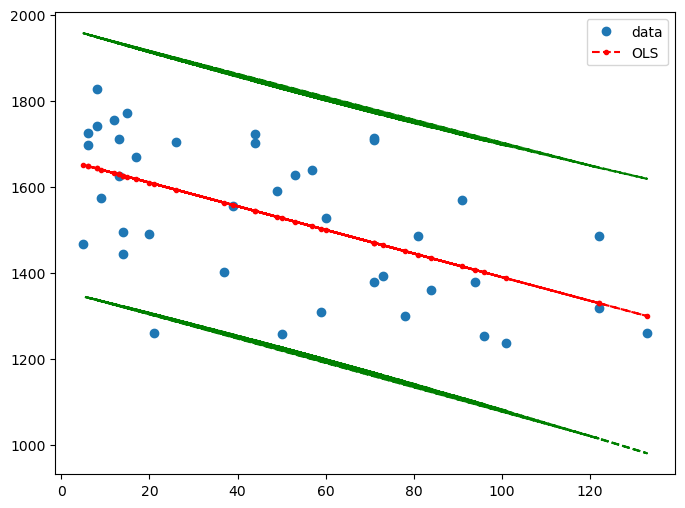

In [19]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_const)
results = model.fit()

prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

Text(0, 0.5, 'Остатки')

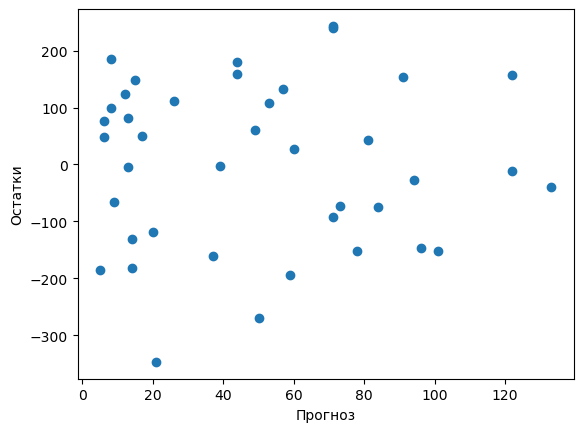

In [20]:
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

### Вывод
- Коэффициент детерминации достаточно низок, чтобы говорить о явной взаимосвязи параметров
- Анализ астатков показывает, что прогнозные значения далеки от реальных из чего можно сделать вывод, что взаимосвязь между параметрами слабая 

In [21]:
# Разделим датафрейм на две части по значению столбца location 

df_south = df[df['location'] == 'South']
df_north = df[df['location'] == 'North']

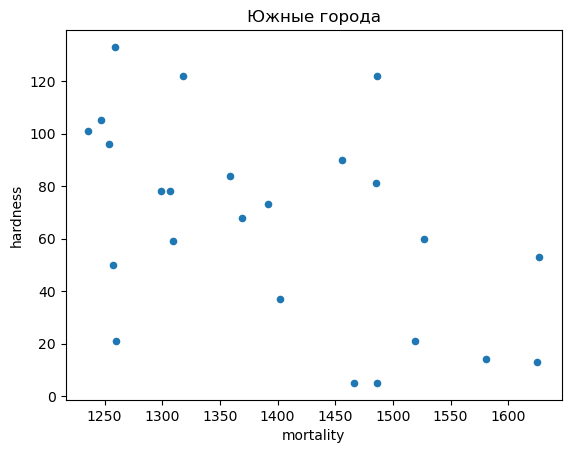

<Axes: title={'center': 'Северные города'}, xlabel='mortality', ylabel='hardness'>

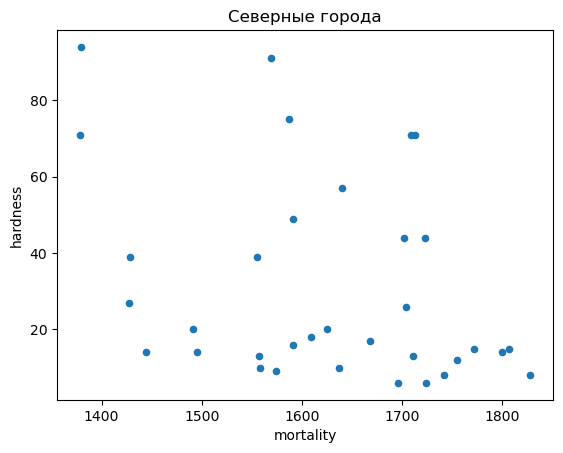

In [22]:
df_south.plot(kind='scatter', x='mortality', y='hardness', title='Южные города')
plt.show()
df_north.plot(kind='scatter', x='mortality', y='hardness', title='Северные города')

In [23]:
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.506602
mortality,-0.506602,1.000000


In [24]:
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.341395
mortality,-0.341395,1.000000


In [25]:
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.514908
mortality,-0.514908,1.000000


In [26]:
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.357378
mortality,-0.357378,1.000000


In [27]:
X1 = df_south['hardness']
y1 = df_south['mortality']

X2 = df_north['hardness']
y2 = df_north['mortality']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

X1_train = X1_train.values.reshape(-1, 1)
X2_train = X2_train.values.reshape(-1, 1)

In [28]:
model_south = LinearRegression()
model_south.fit(X1_train, y1_train)

model_north = LinearRegression()
model_north.fit(X2_train, y2_train)

LinearRegression()

In [29]:
X1_test = X1_test.values.reshape(-1, 1)
X2_test = X2_test.values.reshape(-1, 1)

In [30]:
X1_test

array([[122],
       [101],
       [105],
       [ 50],
       [ 14],
       [ 21],
       [133],
       [  5]], dtype=int64)

In [31]:
y1_test

18    1318
41    1236
0     1247
48    1257
32    1581
19    1260
34    1259
2     1466
Name: mortality, dtype: int64

In [32]:
y1_pred = model_south.predict(X1_test)
y1_pred

array([1336.04508938, 1370.3393613 , 1363.80711903, 1453.62545023,
       1512.41563065, 1500.98420668, 1318.08142314, 1527.11317576])

In [33]:
y1_test

18    1318
41    1236
0     1247
48    1257
32    1581
19    1260
34    1259
2     1466
Name: mortality, dtype: int64

In [34]:
model_south.score(X1_test, y1_test)

-0.24934103920379402

In [35]:
model_north.score(X2_test, y2_test)

-0.25125665293836663

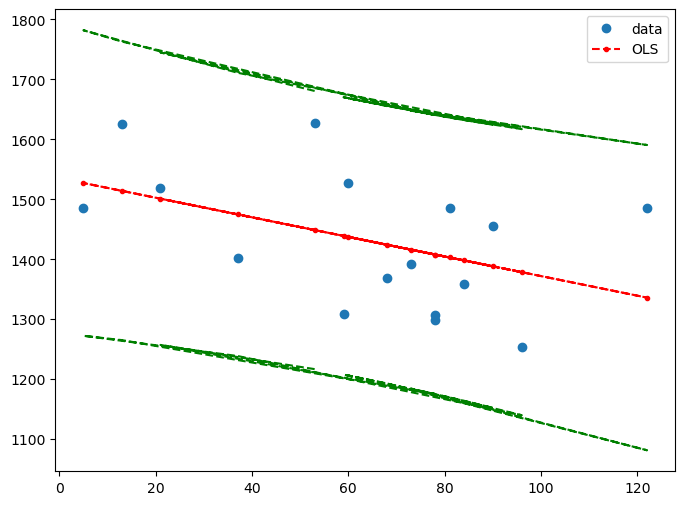

In [36]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

X1_const = sm.add_constant(X1_train)

model = sm.OLS(y1_train, X1_const)
results = model.fit()

prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X1_const.iloc[:, 1], y1_train, 'o', label="data")
ax.plot(X1_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X1_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X1_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')